In [166]:
import pyreadstat
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

Target 2nd Work

W21Q15A1, W21Q15B1, W21Q15C1, W21Q15D1, W21Q15E1

W21Q15A2, W21Q15B2, W21Q15C2, W21Q15D2, W21Q15E2

In [44]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from xgboost import plot_importance

def XGBoost_binary(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    params = {'objective': 'binary:logistic',  # Binary classification
              'eval_metric': 'logloss'         # Logarithmic loss
             }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    num_rounds = 300  
    model = xgb.train(params, dtrain, num_rounds)
    
    plot_importance(model)
    plt.show()
    
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convert probabilities to class labels

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    feature_importance = model.get_score(importance_type='weight')
    
    return accuracy, feature_importance

In [128]:
def XGBoost_multiclass(X, y, feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    params = {
        'objective': 'multi:softmax',  # Multi-class classification
        'num_class': len(set(y)),      # Number of classes
        'eval_metric': 'merror'         # Error rate (1-accuracy)
    }
    
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

    num_rounds = 300
    model = xgb.train(params, dtrain, num_rounds)
    y_pred = model.predict(dtest)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    xgb.plot_importance(model, xlabel='Feature importance', ylabel='Features', 
                        title='Feature Importance', importance_type='weight', show_values=False)
    plt.show()

    # Extract feature importance
    #feature_importance = model.get_score(importance_type='weight')
    
    #plot_importance(model)
    #plt.show()
    
    feature_importance = model.get_score(importance_type='weight')
    
    return accuracy, feature_importance

In [4]:
def call_df():
    path = 'C:/Users/hml76/Desktop/UMN/연구/HRD_Minjeong/Data/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    df, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W21ID2', 'W21ID3']
    df = df.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return df

# 첫번째 거른거

In [6]:
lst_R1 = ['W21IND1', 'W21SCALE', 'W21Q01B', 'W21Q02B', 'W21Q03A', 'W21Q03B', 'W21Q04', 'W21Q05B', 'W21Q061A', 'W21Q061B', 
'W21Q061C', 'W21Q061D', 'W21Q062A', 'W21Q062B', 'W21Q062C', 'W21Q062D', 'W21Q07', 'W21Q081A', 'W21Q081B', 'W21Q081C', 
'W21Q081D', 'W21Q081E', 'W21Q082A', 'W21Q082B', 'W21Q082C', 'W21Q082D', 'W21Q082E', 'W21Q083A', 'W21Q083B', 'W21Q083C', 
'W21Q083D', 'W21Q083E', 'W21Q09A', 'W21Q09B', 'W21Q09C', 'W21Q09D', 'W21Q09E', 'W21Q09F', 'W21Q09G', 'W21Q09H', 'W21Q10A', 
'W21Q10B', 'W21Q10C', 'W21Q10D', 'W21Q11A1', 'W21Q11B1', 'W21Q11A2', 'W21Q11B2', 'W21Q12A', 'W21Q12B', 'W21Q12C', 'W21Q13',
'W21Q14A', 'W21Q14B', 'W21Q14C', 'W21Q14D', 'W21Q14E', 'W21Q14F', 'W21Q15A1', 'W21Q15B1', 'W21Q15C1', 'W21Q15D1', 'W21Q15E1',
'W21Q15A2', 'W21Q15B2', 'W21Q15C2', 'W21Q15D2', 'W21Q15E2', 'W21Q16A1', 'W21Q16A2', 'W21Q17', 'W21Q18A', 'W21Q18B', 'W21Q19',
'W21Q191', 'W21Q192', 'W21Q20', 'W21Q21', 'W21Q22A', 'W21Q22B', 'W21Q22C', 'W21Q22D', 'W21Q22E', 'W21Q22F', 'W21Q23A',
'W21Q23B', 'W21Q23C', 'W21Q23D', 'W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F', 'W21Q25A', 'W21Q25B', 
'W21Q25C', 'W21Q25D', 'W21Q25E', 'W21Q25F', 'W21Q25G', 'W21Q25H', 'W21Q25I', 'W21Q25J', 'W21Q25K', 'W21Q25L', 'W21Q26A', 
'W21Q26B', 'W21Q26C', 'W21Q261', 'W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D', 'W21Q27E', 'W21Q27F', 'W21Q27G', 'W21Q28', 
'W21Q29', 'W21Q302', 'W21DQ01', 'W21DQ02B', 'W21DQ03', 'W21DQ04', 'W21DQ041']

In [7]:
df = call_df()

nan_values = df.isna()
nan_count_per_column = nan_values.sum()
Nan_cols = []
columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
print("Columns with NaN values and count of NaN values:")
for column, count in columns_with_nan.items():
    print(f"Column '{column}' has {count} NaN value(s).")
    Nan_cols.append(column)    
    
filtered_list = [x for x in lst_R1 if x not in Nan_cols]    

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


In [ ]:
'''for i in range(len(lst_R1)):
    print(df[lst_R1[i]].value_counts(), "\n")

In [180]:
Result = []

In [181]:
priority1 = ['W21Q15A1', 'W21Q15B1', 'W21Q15C1', 'W21Q15D1', 'W21Q15E1']
priority2 = ['W21Q15A2', 'W21Q15B2', 'W21Q15C2', 'W21Q15D2', 'W21Q15E2']

scaler = StandardScaler()

for i in range(len(priority1)):
    for j in range(len(df.columns)):
        if df.columns[j] == priority1[i]:
            print(j)
            
cols = list(df.columns)            

62
63
64
65
66


In [213]:
idx = 66
DF = call_df()
print(f"\nIndex {idx}  ========================\n", DF[DF.columns[idx]].value_counts()) #DF.shape


Index 66  ========================
 2.0    6613
1.0    2903
Name: W21Q15E1, dtype: int64


In [214]:
total_labels, Erased_labels = [1,2], []
#total_labels, Erased_labels = [2,3,4], [1,5,8]
#total_labels, Erased_labels = [2,3,4], [1,5]

#DF = DF[DF[cols[idx]] != 2] #1이면 삭제
#DF = DF[~((DF[cols[idx]] == Erased_labels[0]) | (DF[cols[idx]] == Erased_labels[1]))] #불필요한 레이블 삭제
#DF = DF[~((DF[cols[idx]] == Erased_labels[0]) | (DF[cols[idx]] == Erased_labels[1]) | (DF[cols[idx]] == Erased_labels[2]))] 

N = 2903 #가장 적은 레이블 수
 
for L in [2]: #가장 적은 레이블 보다 큰 레이블들
    idx_with_condition = df[df[cols[idx]] == L].index
    random_idx = np.random.choice(idx_with_condition, size=(len(idx_with_condition)-N), replace=False) #랜덤이라 성능 차이가 좀날수도
    DF = DF.drop(random_idx)

print(f"\nIndex {idx}  ========================\n", DF[cols[idx]].value_counts())

y = DF[cols[idx]]
subtract = np.min(y)
y = y-subtract

DF = DF.drop(columns = [cols[idx]])
DF = DF.drop(columns = [cols[idx+5]]) ###########
DF = DF.drop(columns = ['W21ID1'])
DF = DF.drop(columns = ['W21Q31A'])


F_names = list(DF.columns)
DF = scaler.fit_transform(DF)

DF.shape


Index 66  ========================
 1.0    2903
2.0    2903
Name: W21Q15E1, dtype: int64


(5806, 135)

66
Accuracy: 0.7469879518072289


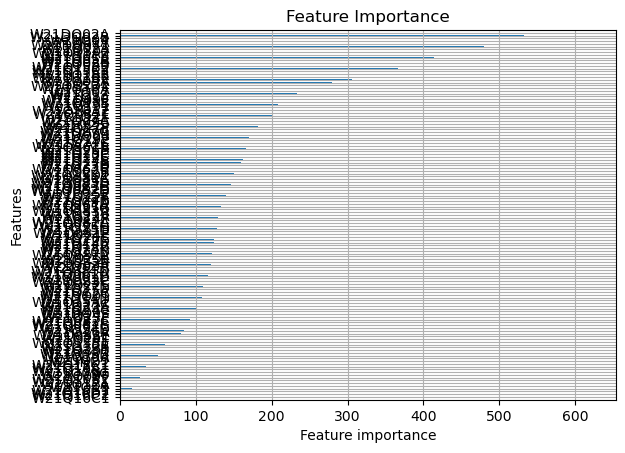

In [215]:
print(idx)
acc, F_importance = XGBoost_multiclass(DF, y, F_names)

In [216]:
Result.append((acc, total_labels, cols[idx], F_importance))
gc.collect()
del DF, idx, y

In [217]:
top_K = 5

for i in range(len(Result)):
    sorted_f = {k: v for k, v in sorted(Result[i][-1].items(), key=lambda item: item[1], reverse=True)}
    print(list(sorted_f.items())[:top_K])

[('W21Q31A', 1490.0), ('W21ID1', 1350.0), ('W21Q04', 666.0), ('W21DQ02B', 610.0), ('W21DQ02A', 592.0)]
[('W21Q31A', 1390.0), ('W21ID1', 1286.0), ('W21Q04', 660.0), ('W21DQ02B', 614.0), ('W21DQ02A', 576.0)]
[('W21Q31A', 1324.0), ('W21ID1', 1012.0), ('W21DQ02B', 574.0), ('W21DQ02A', 570.0), ('W21Q04', 564.0)]
[('W21Q31A', 1328.0), ('W21ID1', 1232.0), ('W21DQ02A', 578.0), ('W21Q04', 540.0), ('W21DQ02B', 540.0)]
[('W21Q31A', 1218.0), ('W21ID1', 1174.0), ('W21Q04', 550.0), ('W21DQ02A', 510.0), ('W21DQ02B', 494.0)]
[('W21ID1', 1178.0), ('W21DQ02B', 598.0), ('W21Q01A', 580.0), ('W21Q04', 544.0), ('W21DQ02A', 532.0)]
[('W21Q31A', 1214.0), ('W21Q01A', 540.0), ('W21DQ02A', 540.0), ('W21Q04', 530.0), ('W21DQ02B', 508.0)]
[('W21DQ02A', 594.0), ('W21DQ02B', 532.0), ('W21Q04', 520.0), ('W21Q01A', 506.0), ('W21DQ041', 486.0)]


In [ ]:
[('W21Q31A', 1344.0), ('W21ID1', 1304.0), ('W21Q04', 648.0), ('W21DQ02A', 638.0), ('W21DQ02B', 582.0)]
[('W21Q31A', 1296.0), ('W21ID1', 1226.0), ('W21DQ02A', 634.0), ('W21Q04', 622.0), ('W21DQ02B', 558.0)]
[('W21Q31A', 1194.0), ('W21ID1', 1078.0), ('W21DQ02A', 584.0), ('W21DQ02B', 570.0), ('W21Q04', 552.0)]
[('W21Q31A', 1334.0), ('W21ID1', 1254.0), ('W21Q04', 550.0), ('W21DQ02B', 550.0), ('W21DQ02A', 518.0)]
[('W21Q31A', 1150.0), ('W21ID1', 1104.0), ('W21DQ02B', 540.0), ('W21DQ02A', 498.0), ('W21Q04', 490.0)]

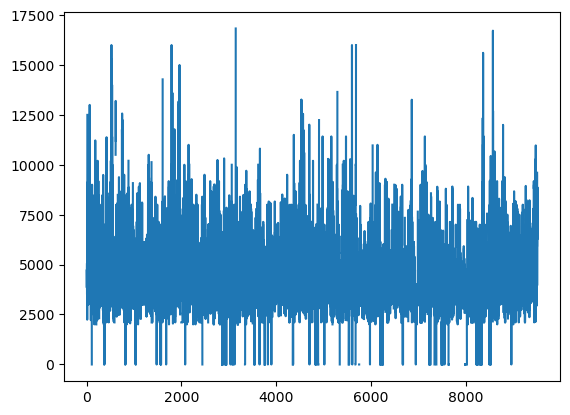

In [165]:
plt.plot(df['W21Q31A'])

In [ ]:
Y = aX + b



In [ ]:
X = [x1, x2, x3 ... xn]
Y = [y1, y2, y3 ... yn]

In [ ]:
#성능은 설문조사의 신뢰도와 직결하는 듯함 (보통 3,4,5가 높으면 성능이 확실히 낮은듯)

#기존의 설문조사자체의 tendency(Bias)를 뺀다?

In [71]:
len(Result)

5

In [72]:
Result[0]

(0.720489977728285, [1, 2], 'W21Q15A1')